<a href="https://colab.research.google.com/github/snowboarder-hk/hello-world/blob/master/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://qiita.com/fukuit/items/b3fa460577a0ea139c88 reference
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
# 28 x 28の画像がgrayscaleで1chなので、28, 28, 1にreshapeする
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 0-255の整数値を0〜1の小数に変換する
# MNISTって必ずこの処理入るけれど、意味あるのかな
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

import keras
# one-hot vector形式に変換する
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.8925 - accuracy: 0.7138 - val_loss: 0.3232 - val_accuracy: 0.9032
Epoch 2/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3977 - accuracy: 0.8795 - val_loss: 0.2371 - val_accuracy: 0.9312
Epoch 3/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3438 - accuracy: 0.8970 - val_loss: 0.1895 - val_accuracy: 0.9460
Epoch 4/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3083 - accuracy: 0.9076 - val_loss: 0.1706 - val_accuracy: 0.9510
Epoch 5/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2717 - accuracy: 0.9194 - val_loss: 0.1528 - val_accuracy: 0.9567
Epoch 6/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2497 - accuracy: 0.9271 - val_loss: 0.1288 - val_accuracy: 0.9628
Epoch 7/10
60000/60000 [==============================] - 139s

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07897099114190786
Test accuracy: 0.9754999876022339


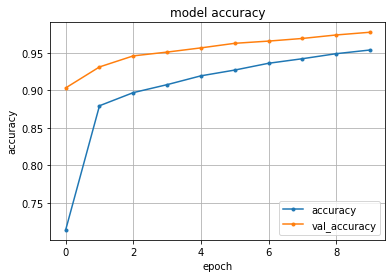

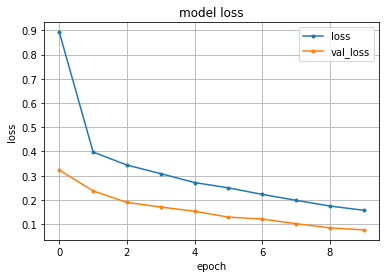

In [9]:
from matplotlib import pyplot as plt

# 精度のplot
plt.plot(history.history['accuracy'], marker='.', label='accuracy')
plt.plot(history.history['val_accuracy'], marker='.', label='val_accuracy')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# 損失のplot
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()